# Computer Vision Task

A Convolutional Neural Network (CNN) Model to detect/classify bean leaf diseases.

A Convolutional Neural Network (CNN) is a deep learning model designed specifically for processing and analyzing visual data. It has the ability to automatically and adaptively learn spatial hierarchies of features from input images.

Working Mechanism of a CNN:
1. *Input* : The input to a CNN is typically a raw image represented as a multi-dimensional array.
2. *Convolution and Activation* : The input image is convolved with various filters, and the activation function is applied to introduce non-linearity.
3. *Pooling* : The feature maps are down-sampled using pooling operations to reduce the spatial dimensions.
4. *Repetition* : Multiple convolutional and pooling layers are stacked to create deep architectures capable of learning complex features at different levels of abstraction.
5. *Flattening* : The output of the final pooling layer is flattened into a one-dimensional vector.
6. *Fully Connected Layers* : The flattened vector is passed through fully connected layers for high-level reasoning.
7. *Output*: The final layer uses an appropriate activation function (e.g., softmax for classification) to produce the output.

In [ ]:
# Importing TensorFlow and other necessary libraries
import matplotlib.pyplot as plt # for visualization
import numpy as np # for numrical computing
import PIL # Python Imaging Library: for opening, manipulating, and saving many image file formats
import tensorflow as tf #  for building and deploying the model 

from tensorflow import keras #  provides an interface for building and training the CNN model

In [3]:
# Defining bean leaf dataset directory
import pathlib
data_dir = pathlib.Path(r'C:\Users\SirIsaac\MyPythonProjects\MSc. Data Science and AI\TERM 3 AY 22-23\MSDA 302 DEEP LEARNING WITH TENSORFLOW\Week 6\Bean_data')
# Training set directory
train_dir = data_dir/'train'

# Validation set directory
validation_dir = data_dir/'validation'

# Test set directory
test_dir = data_dir/'test'

In [4]:
# Defining batch size and input shape for the model
batch_size = 32 # model will process 32 images at a time during each iteration of model training
img_height = 180 # height dimension of input image in the model
img_width = 180 # width dimension of input image in the model

# Data Processing

In [5]:
# Creating TensorFlow training dataset
train_set = keras.utils.image_dataset_from_directory(
  train_dir,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 1034 files belonging to 3 classes.


In [6]:
# Creating TensorFlow validation dataset
valid_set = keras.utils.image_dataset_from_directory(
  validation_dir,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 133 files belonging to 3 classes.


In [7]:
# Creating TensorFlow test dataset
test_set = keras.utils.image_dataset_from_directory(
  test_dir,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 128 files belonging to 3 classes.


The dataset contains 1295 bean leaf images: 1034 training images, 133 validation images and 128 test images. Each set is divided into 3 classes: the healthy class, and 2 disease classes, that is, the bean rust class and the angular leaf spot class.

In [8]:
# Defining class names
class_names = train_set.class_names 
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


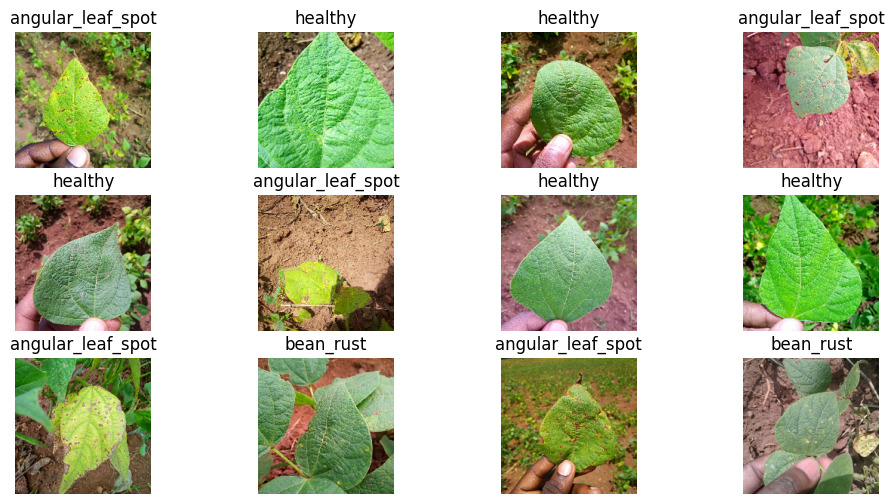

In [9]:
# Visualizing a few bean leaf image samples from training set
plt.figure(figsize = (12, 6))
for images, labels in train_set.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
# image_batch and labels_batch shapes to verify defined batch size and label dimensions
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


(32, 180, 180, 3) shows that the Image_batch contains 32 images, each of shape (180, 180) and 3 color channels (RGB). 
(32,) indicates that the labels_batch contains 32 labels, one for each image in the batch_image.

In [11]:
# Configuring training, validation, and test sets for performance during training
# it involves using caching, shuffling, and prefetching to optimize data loading and processing
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valid_set = valid_set.cache().prefetch(buffer_size = AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
# Defining the number of classes
n_classes = len(class_names)
print(n_classes)

3


# CNN model

Why CNN model: It provides unique image features. It has the ability to automatically and adaptively learn spatial hierarchies of features from input images
- It has convolutional layers, which apply convolutional operations on the input data. The kernel filters help to extract unique features from an image.
- Pooling layers after every convolutional operation downsample the dimensions of the extracted feature maps. This helps achieve the brightest color of an image.
- Activation functions within the layers introduce non-linearity dimensions into the network to enable the model capture non-linear patterns in the input data.
- Fully connected output layer performs the final image classification based on the extracted features.

Adding a dropout layer to the model
- This is a regularization technique used to enable the model generalize unseen data better, so that it does not overfit the training data.
- It is a special layer added to the network to randomly drop a percentage of neurons during the training.

In [13]:
# padding = 'same' will pad the input tensor,
# so that the output of the convolution operation has the same spatial size as the input

# For the 1st convolutional block, there is one convolutional layer,
# with 16 convolutional filters of size 3*3 to the input image,
# followed by a max pooling layer of 2*2, which reduces the spatial dimensions of the previous layer's output
# activation = 'relu' introduces non-linearity dimension to the layer
# Adding a dropout layer to handle overfitting issues

# layers.Conv2D() and layers.MaxPooling2D() repeat the process, 
# gradually increasing the number of filters for Conv blocks 2 and 3

# model = tf.keras.models.Sequential([]) allows for building a model sequentially by adding one layer at a time
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)), # Standardizing input channel values to be in [0, 1] range

  # Convolution block 1: 16 filters each of size 3, MaxPool operation
  keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),

  # Convolution block 2: 32 filters each of size 3, MaxPool operation
  keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),

  # Convolution block 3: 64 filters each of size 3, MaxPool operation
  keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),

  # Flattening the convolutional features
  keras.layers.Flatten(), # creating a 1-dimensional vector
  keras.layers.Dense(128, activation = 'relu'), # adding a densely connected layer with 128 neurons
  keras.layers.Dropout(0.3), # randomly dropping out 30% of the output units
  keras.layers.Dense(n_classes) # fully connected output layer with 3 neurons representing the n_classes
])

# Model compilation: configuring the model for training

In [14]:
# optimizer = 'adam' is an optimization algorithm:
# it adapts the learning rate during training to improve convergence

# Sparsecategoricalcrossentropy loss function is used because this is a multi-class classification task
# 'from_logits = True' shows that the output of the model is not normalized by the softmax activation function

# metrics = ['accuracy'] specifies the evaluation metric(s) to be used during training and evaluation,
# for evaluating the model performance
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [15]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Model summary:
- Rescalling layer does the rescalling of the input data into a range of [0,1]. Has no new parameters introduced.
- Conv2D layer 1 has 16 filters of size (3, 3) each and produces feature maps of the input data as an output. It has 448 paramaters.
- MaxPooling2D layer 1 reduces the dimensions of the feature maps produced by Conv2D layer 1, by a factor of 2. It has no parameters.
- Conv2D layer 2 has 32 filters of size (3, 3) each and produces feature maps of the input data as an output. It has 4640 paramaters.
- MaxPooling2D layer 2 reduces the dimensions of the feature maps produced by Conv2D layer 2, by a factor of 2. It has no parameters.
- Conv2D layer 3 has 64 filters of size (3, 3) each and produces feature maps of the input data as an output. It has 18496 paramaters.
- MaxPooling2D layer 3 reduces the dimensions of the feature maps produced by Conv2D layer 3, by a factor of 2. It has no parameters.
- Flatten layer flattens the 3D convolution feature maps into a 1D vector.
- Dense layer 1 is the first fully connected layer with 128 units and it is connected to the previous layer.
- Dense layer 2: Fully connected output layer representing the 3 classes of the classification task.
- The model has 3989027 trainable parameters which are updated during the training.

In [16]:
# Training the model for 10 epochs
epochs = 10
history = model.fit(
  train_set,
  validation_data = valid_set,
  epochs = epochs
)

Epoch 1/10
33/33 [==============================] - 21s 546ms/step - loss: 0.9445 - accuracy: 0.5551 - val_loss: 0.7251 - val_accuracy: 0.6842
Epoch 2/10
33/33 [==============================] - 18s 555ms/step - loss: 0.6992 - accuracy: 0.6915 - val_loss: 0.5551 - val_accuracy: 0.8045
Epoch 3/10
33/33 [==============================] - 19s 560ms/step - loss: 0.5920 - accuracy: 0.7476 - val_loss: 0.5161 - val_accuracy: 0.7669
Epoch 4/10
33/33 [==============================] - 18s 559ms/step - loss: 0.5186 - accuracy: 0.7776 - val_loss: 0.5028 - val_accuracy: 0.7218
Epoch 5/10
33/33 [==============================] - 17s 530ms/step - loss: 0.4816 - accuracy: 0.7834 - val_loss: 0.5030 - val_accuracy: 0.7895
Epoch 6/10
33/33 [==============================] - 18s 553ms/step - loss: 0.4025 - accuracy: 0.8356 - val_loss: 0.5448 - val_accuracy: 0.8045
Epoch 7/10
33/33 [==============================] - 18s 558ms/step - loss: 0.3475 - accuracy: 0.8627 - val_loss: 0.4922 - val_accuracy: 0.8195

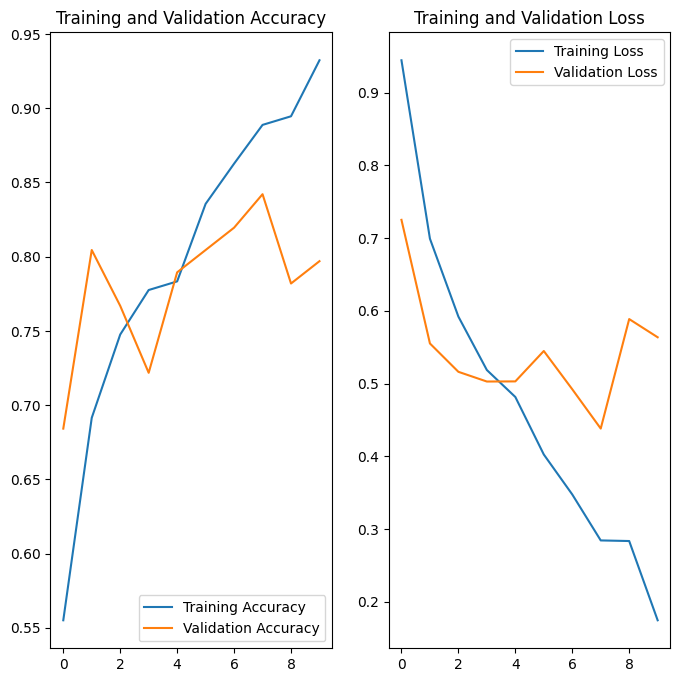

In [17]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluating the model on test set

In [18]:
# Evaluating the model on test set
test_loss, test_accuracy = model.evaluate(test_set)
train_loss, train_accuracy = model.evaluate(train_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

33/33 [==============================] - 4s 113ms/step - loss: 0.0965 - accuracy: 0.9855
Test Loss: 0.5612700581550598
Test Accuracy: 0.8125
Train Loss: 0.09650030732154846
Train Accuracy: 0.9854932427406311


The model has an accuracy of 81% on test set, which is a pretty good performance.

# Predictions on new beans data

In [27]:
# Defining new beans dataset directory
new_data_dir = pathlib.Path(
    r'C:\Users\SirIsaac\MyPythonProjects\MSc. Data Science and AI\TERM 3 AY 22-23\MSDA 302 DEEP LEARNING WITH TENSORFLOW\Week 6\Assignment Images-20230602'
)

images = new_data_dir/'Images'

In [31]:
# Creating new beans TensorFlow dataset
new_set = keras.utils.image_dataset_from_directory(
    images,
    image_size=(img_height, img_width),
    labels=None,          
    shuffle=False         
)

# Prefetch for better performance
new_set = new_set.prefetch(tf.data.AUTOTUNE)

Found 13 files belonging to 1 classes.


The images belong to one class since they are not classified.

1/1 [==============================] - 0s 293ms/step


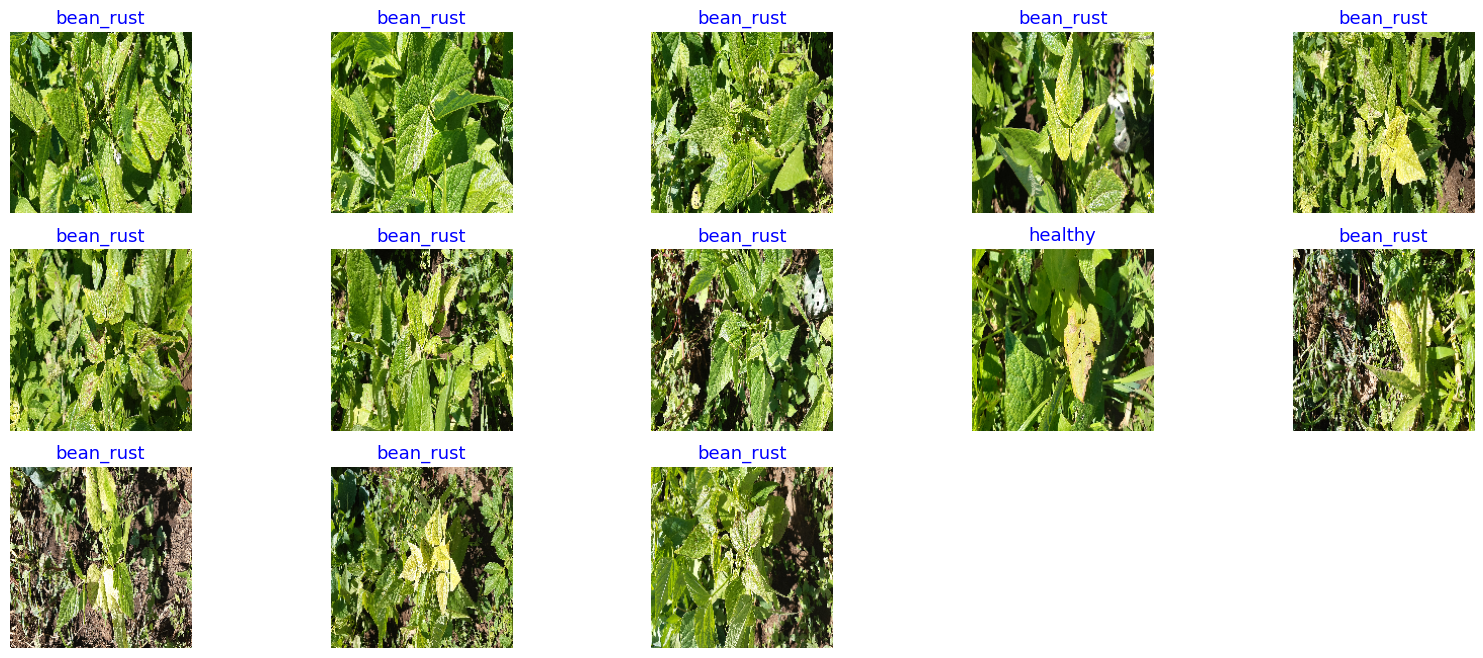

Class 'angular_leaf_spot': 0 images
Class 'bean_rust': 12 images
Class 'healthy': 1 images


In [ ]:
# Predictions on new beans data
# Defining model_evaluation function
def model_evaluation(dataset, model):
    class_names = ['angular_leaf_spot', 'bean_rust', 'healthy']
    num_rows = 3
    num_cols = 5

    # Convert batched dataset to unbatched (no labels)
    dataset = dataset.unbatch()

    # Get images (no label unpacking)
    images = list(dataset.take(num_rows * num_cols))  # List of tensors, not (image, label) pairs

    # Predictions
    predictions = model.predict(np.array(images))  # Directly pass images

    plt.figure(figsize=(20, 8))
    predicted_indices = []

    for idx, image in enumerate(images):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")

        # Normalize if needed (assuming model expects [0, 1])
        image = image / 255.0  
        plt.imshow(image)

        pred_idx = tf.argmax(predictions[idx]).numpy()
        predicted_indices.append(pred_idx)

        pred_class_name = class_names[pred_idx]
        plt.title(pred_class_name, fontdict={'fontsize': 13}, color='b')

    plt.show()
    return np.array(predicted_indices)

# Call the updated function
predicted_indices = model_evaluation(new_set, model)

# Print class counts
class_names = ['angular_leaf_spot', 'bean_rust', 'healthy']
class_counts = np.bincount(predicted_indices)
for class_idx, count in enumerate(class_counts):
    print(f"Class '{class_names[class_idx]}': {count} images")

In [ ]:
# Saving the trained CNN model
# model.save('C:/MSDA 302 DEEP LEARNING WITH TENSORFLOW/Week 6/CNN_Trained_Model.keras')